
# Project: Investigate a Dataset for Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

we are going to invistage No-show appointments dataset consist of 100k rows to see what maybe cause not show up the appointment 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

we will need to read the data from kaggle dataset and do a  proper assess and cleaning our data set to make it ready to get insights about what we need without affect the result

### General Properties

In [7]:


df = pd.read_csv("KaggleV2-May-2016.csv")


# Asess

In [8]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### this is so great :
- there is no missing data to handle with it


##### to know if there is any duplicated row

In [10]:
df.duplicated().sum()

0

##### to know if there is any duplicated client

In [11]:
print(df.PatientId.duplicated().sum())
print(df.PatientId.nunique())

48228
62299


# Quality issues

- `ScheduledDay and AppointmentDay` col. should be represented as datetime type (not object type)
- for `PatientId` we will not to any mathematics operation on it so it should be string (but we can ignore this as will not affect our analysis)


### Data Cleaning 
- convert ScheduledDay and AppointmentDay col. to datetime field

In [12]:
df_clean  = df.copy()
df_clean["ScheduledDay"] = pd.to_datetime(df_clean["ScheduledDay"])
df_clean["AppointmentDay"] = pd.to_datetime(df_clean["AppointmentDay"])
df_clean.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

<a id='eda'></a>
## Exploratory Data Analysis

let's do an overview on all data before we dive into research Question



In [13]:
df_clean.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

 - the min age is `-1`! this doesn't make a sense it is unrealistic
 - the max age peron seems 115 wow they have a long life 

In [14]:
df_clean[df_clean.Age <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29 08:53:02+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16 12:30:58+00:00,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06 14:22:34+00:00,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03 15:18:44+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03 08:56:51+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No


- there are 3539  recored equal 0 and one = -1 this is unrealistic unleass if this patient a baby under one yeat
- i am not sure about this so i will drop this data since i am not sure

In [15]:
df_clean.drop(df_clean[df_clean.Age <= 0].index  , inplace = True)

In [16]:
df_clean[df_clean.Age <= 0] # after test seems eveything is okay for age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


-- let's see a quick overview to see how data looks like in term of distribution to get better understand 

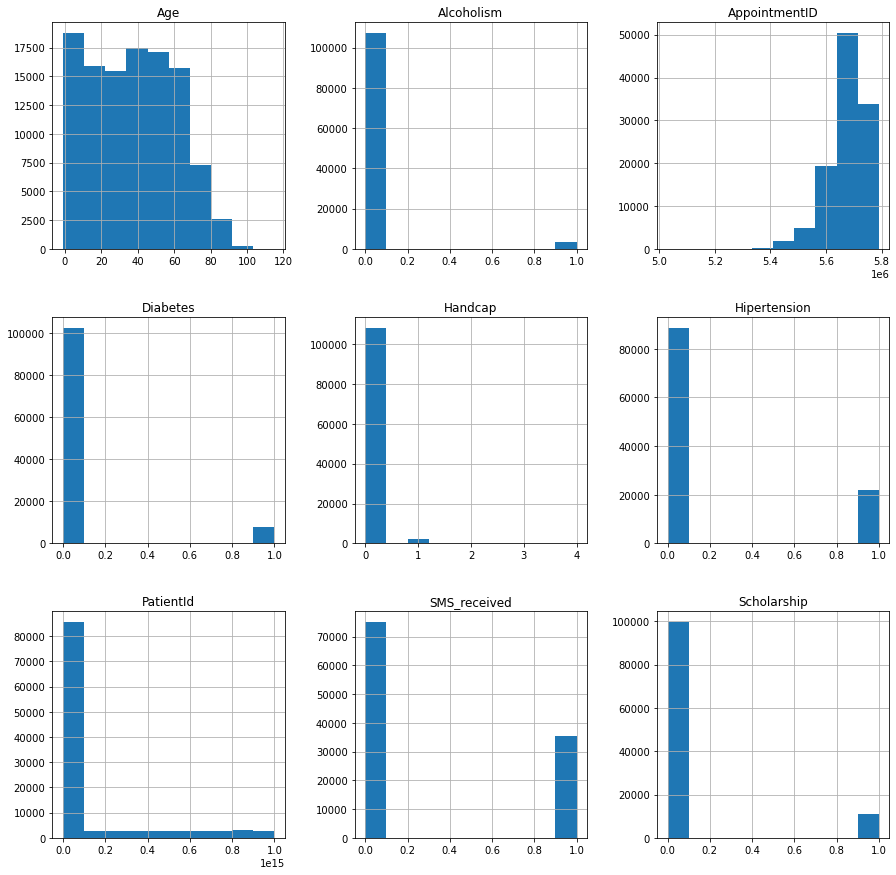

In [17]:
df.hist(figsize=(15,15));

- for age range between 0 and 60 it seems  it is uniform distibution which mean have the same perecnatge on occurance
- for people above 60 it seems right skwed distibution which mean mode > median > mean in other words there is less pople in this age according to previos ages
- most of patients doesn't  have Alcoholism (Good news here ^.^ actually this good for health and social ..etc)
- a small patients  has Diabetes 
- a small number of patients Handcap (so we can't assume now there is association between handcap and show up) 
- sor sms-_received there are about half of patiens receive this is sms (we can consider this case for association between this and show up)



In [18]:
df_clean["No-show"].value_counts()

No     85307
Yes    21680
Name: No-show, dtype: int64

In [19]:
df_clean["No-show"].value_counts(normalize= True)

No     0.797359
Yes    0.202641
Name: No-show, dtype: float64

### about 20% of patients doesn't show up their appointment 
- we can ask ourself what is the reason for that ? is there any partiqual region has most percentage fot not show up their appointment 
- or if there is any association between not show up and age ?
- or if there is any association between not show up and their sms_recived?
- or maybe the time of day 3:pm ? or a specific day starday ..etc
- or maybe not show up occure high in a certain region than other?
- or mayble male are more likely to not show up than Female


In [20]:
df_clean.Neighbourhood.value_counts()

JARDIM CAMBURI                 7586
MARIA ORTIZ                    5563
RESISTÊNCIA                    4235
JARDIM DA PENHA                3851
ITARARÉ                        3412
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

we have 81 uniqe reqion in our dataset

In [21]:
df_clean.Gender.value_counts()

F    70118
M    36869
Name: Gender, dtype: int64

### Research Question 1 (if there is any association between not show up and age ?)

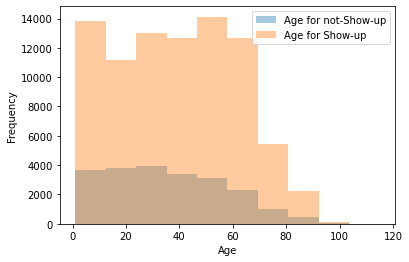

In [22]:
df_clean[df_clean["No-show"] == "Yes"]["Age"].plot(alpha= 0.4 , kind="hist" , label="Age for not-Show-up") 
df_clean[df_clean["No-show"] == "No"]["Age"].plot(alpha = .4 , kind="hist" , label="Age for Show-up")

plt.legend()
plt.xlabel("Age");



### Research Question 2  ( if there is any association between not show up and their sms_recived?)

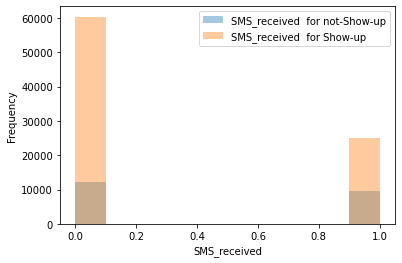

In [23]:
df_clean[df_clean["No-show"] == "Yes"]["SMS_received"].plot(alpha= 0.4 , kind="hist" , label="SMS_received  for not-Show-up") 
df_clean[df_clean["No-show"] == "No"]["SMS_received"].plot(alpha = .4 , kind="hist" , label="SMS_received  for Show-up")

plt.legend()
plt.xlabel("SMS_received");



### Research Question 3 ( if AppointmentDay affeccted people to not show up)

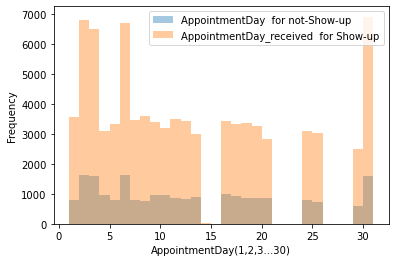

In [24]:
df_clean[df_clean["No-show"] == "Yes"]["AppointmentDay"].dt.day.plot(alpha= 0.4 , bins = 30 , kind="hist" , label="AppointmentDay  for not-Show-up") 
df_clean[df_clean["No-show"] == "No"]["AppointmentDay"].dt.day.plot(alpha = .4 ,bins = 30 , kind="hist" , label="AppointmentDay_received  for Show-up")

plt.legend()
plt.xlabel("AppointmentDay(1,2,3...30)");



array([0, 1], dtype=int64)

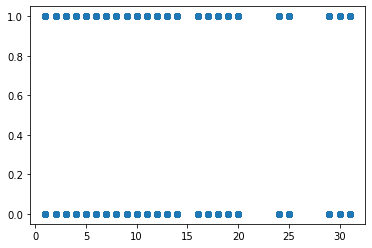

In [25]:
day = df_clean.AppointmentDay.dt.day
condition = lambda x: 1 if x == "Yes" else 0
show_or_not = df_clean["No-show"].apply(condition)

plt.scatter(day, show_or_not)
show_or_not.unique()




<a id='conclusions'></a>
## Conclusions

- there is no  association between not show up and age
- this also werid there is no association between not show up and sms recived
even if people who receive a message dosn't show up
- there is no association between the day if the month and not show up as most of days has the same perecentage for not show up

> __limitation__ : i want to test if there is relationshib between the distance from the client to the doctor and the show up but this  data doesn't available
__limitation__ 2 : unfortunatly i can't do scatter plot even if convert yes or no into a number as we just has to output(0,1)

